<a href="https://colab.research.google.com/github/Kalyandask/FMML-Projects-and-labs/blob/main/AIML_project_Module3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROJECT: Heart Disease Prediction using KNN


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings

In [4]:
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

1. DATA LOADING

In [5]:
print("--- LOADING DATA ---")
# We will use the heart.csv from a stable public source
url = "https://raw.githubusercontent.com/kb22/Heart-Disease-Prediction/master/dataset.csv"
df = pd.read_csv(url)

--- LOADING DATA ---


In [6]:
print(df.head())
print(f"\nDataset Shape: {df.shape}")

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  

Dataset Shape: (303, 14)


2. EXPLORATORY DATA ANALYSIS (EDA)


--- PERFORMING EDA ---


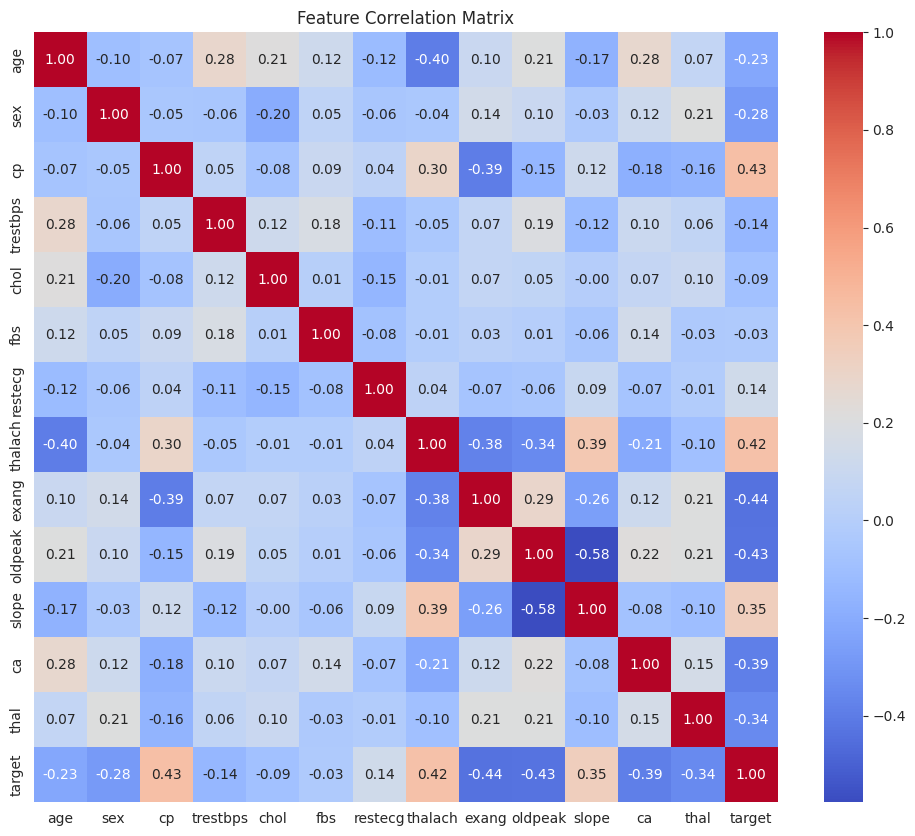

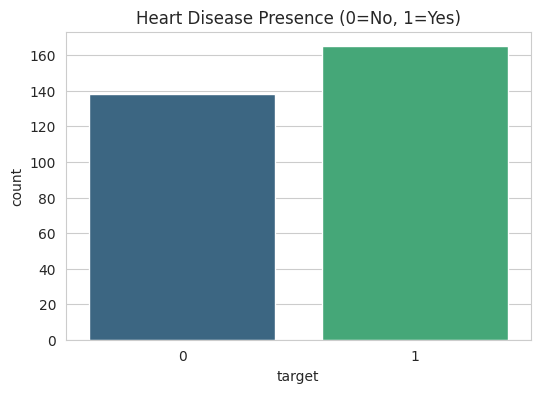

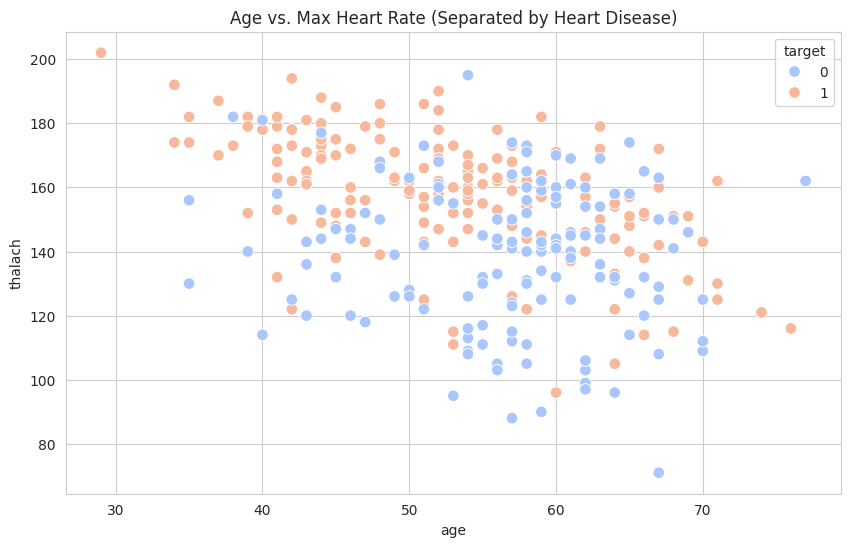

In [7]:
print("\n--- PERFORMING EDA ---")

# A. Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

# B. Target Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df, palette='viridis')
plt.title("Heart Disease Presence (0=No, 1=Yes)")
plt.show()

# C. Age vs. Max Heart Rate (Thalach) colored by Target
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='thalach', data=df, hue='target', palette='coolwarm', s=70)
plt.title("Age vs. Max Heart Rate (Separated by Heart Disease)")
plt.show()

3. PREPROCESSING

In [8]:
X = df.drop('target', axis=1)
y = df['target']

# Split Data (70% Train, 30% Test) - Same as your previous project
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

4. HELPER FUNCTION: ELBOW METHOD

In [9]:
def get_knn_accuracy(X_train, X_test, y_train, y_test, max_k=40):
    error_rate = []
    acc_scores = []

    for i in range(1, max_k):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        pred_i = knn.predict(X_test)
        # Error rate is average where prediction is NOT equal to actual
        error_rate.append(np.mean(pred_i != y_test))
        acc_scores.append(accuracy_score(y_test, pred_i))

    # Find K with max accuracy
    optimal_k = acc_scores.index(max(acc_scores)) + 1
    max_acc = max(acc_scores)

    return error_rate, optimal_k, max_acc

5. EXPERIMENT 1: UNSCALED DATA (Baseline)

In [11]:
print("\n--- EXPERIMENT 1: UNSCALED DATA ---")
error_unscaled, k_unscaled, acc_unscaled = get_knn_accuracy(X_train, X_test, y_train, y_test)
print(f"Best K for Unscaled: {k_unscaled} with Accuracy: {acc_unscaled*100:.2f}%")


--- EXPERIMENT 1: UNSCALED DATA ---
Best K for Unscaled: 10 with Accuracy: 69.23%


6. EXPERIMENT 2: STANDARD SCALER (Z-Score)

In [12]:
print("\n--- EXPERIMENT 2: STANDARD SCALING ---")
# Formula: z = (x - u) / s
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

error_std, k_std, acc_std = get_knn_accuracy(X_train_std, X_test_std, y_train, y_test)
print(f"Best K for Standard Scaled: {k_std} with Accuracy: {acc_std*100:.2f}%")


--- EXPERIMENT 2: STANDARD SCALING ---
Best K for Standard Scaled: 5 with Accuracy: 86.81%


7. EXPERIMENT 3: MIN-MAX SCALER (Task 7 from your file)

In [13]:
print("\n--- EXPERIMENT 3: MIN-MAX SCALING ---")
# Formula: (x - min) / (max - min)
scaler_mm = MinMaxScaler()
X_train_mm = scaler_mm.fit_transform(X_train)
X_test_mm = scaler_mm.transform(X_test)

error_mm, k_mm, acc_mm = get_knn_accuracy(X_train_mm, X_test_mm, y_train, y_test)
print(f"Best K for MinMax Scaled: {k_mm} with Accuracy: {acc_mm*100:.2f}%")


--- EXPERIMENT 3: MIN-MAX SCALING ---
Best K for MinMax Scaled: 9 with Accuracy: 81.32%


8. VISUALIZATION OF RESULTS

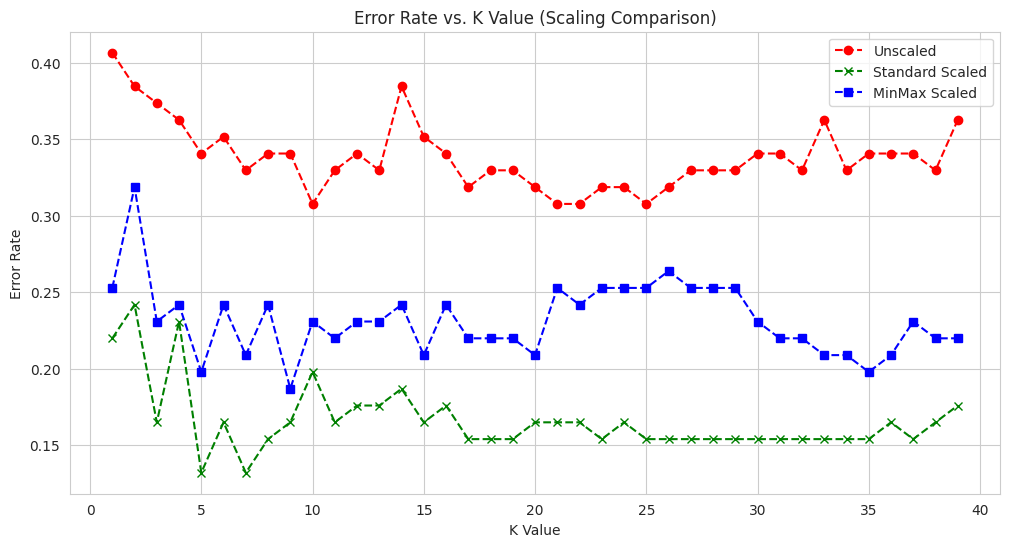


--- FINAL CLASSIFICATION REPORT (Using Standard Scaler and Best K) ---
[[35  6]
 [ 6 44]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        41
           1       0.88      0.88      0.88        50

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



In [14]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error_unscaled, color='red', linestyle='dashed', marker='o', label='Unscaled')
plt.plot(range(1, 40), error_std, color='green', linestyle='dashed', marker='x', label='Standard Scaled')
plt.plot(range(1, 40), error_mm, color='blue', linestyle='dashed', marker='s', label='MinMax Scaled')

plt.title('Error Rate vs. K Value (Scaling Comparison)')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.legend()
plt.show()

# Final Report on the best model (Likely Standard Scaled)
print("\n--- FINAL CLASSIFICATION REPORT (Using Standard Scaler and Best K) ---")
final_knn = KNeighborsClassifier(n_neighbors=k_std)
final_knn.fit(X_train_std, y_train)
final_pred = final_knn.predict(X_test_std)

print(confusion_matrix(y_test, final_pred))
print(classification_report(y_test, final_pred))